<a href="https://colab.research.google.com/github/ShaoFuLiu/tSDRG_DataAnalysis/blob/master/TestSortingData_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **tSDRG Data Analysis**

In [13]:
## Import library
import os
import math
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [6]:
## Basic parameter
cnames = {
'blue':                 '#0000FF',
'blueviolet':           '#8A2BE2',
'brown':                '#A52A2A',
'burlywood':            '#DEB887',
'cadetblue':            '#5F9EA0',
'chocolate':            '#D2691E',
'crimson':              '#DC143C',
'cyan':                 '#00FFFF',
'darkblue':             '#00008B',
'darkcyan':             '#008B8B',
'darkgoldenrod':        '#B8860B',
'darkgray':             '#A9A9A9',
'darkgreen':            '#006400',
'darkkhaki':            '#BDB76B',
'darkmagenta':          '#8B008B',
'darkolivegreen':       '#556B2F',
'darkorange':           '#FF8C00',
'darkorchid':           '#9932CC',
'darkred':              '#8B0000',
'darksalmon':           '#E9967A',
'darkseagreen':         '#8FBC8F',
'darkslateblue':        '#483D8B',
'darkslategray':        '#2F4F4F',
'darkturquoise':        '#00CED1',
'darkviolet':           '#9400D3',
'deeppink':             '#FF1493',
'deepskyblue':          '#00BFFF',
'dimgray':              '#696969',
'dodgerblue':           '#1E90FF',
'firebrick':            '#B22222',
'floralwhite':          '#FFFAF0',
'forestgreen':          '#228B22',
'fuchsia':              '#FF00FF',
'gainsboro':            '#DCDCDC',
'ghostwhite':           '#F8F8FF',
'gold':                 '#FFD700',
'goldenrod':            '#DAA520',
'gray':                 '#808080',
'green':                '#008000',
'greenyellow':          '#ADFF2F',
'honeydew':             '#F0FFF0',
'hotpink':              '#FF69B4',
'indianred':            '#CD5C5C',
'indigo':               '#4B0082',
'ivory':                '#FFFFF0',
'khaki':                '#F0E68C',
'orangered':            '#FF4500',
'orchid':               '#DA70D6'}
carr = []
for cmap in cnames.keys():
    carr.append(cmap)

spin = int(2)
BC = 'PBC'
P = 10
M = 40

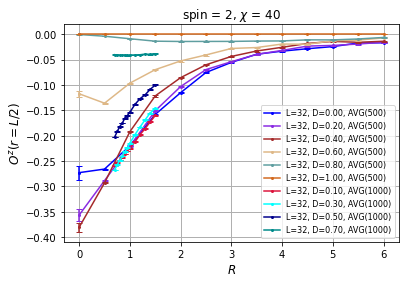

In [40]:
# Jdis & String Order Parameter

# Ls = [32,48,64]
Ls = [32]
Dimer = ["Dim000","Dim020","Dim040","Dim060","Dim080","Dim100"]
Dimer2 = ["Dim010","Dim030","Dim050","Dim070"]
# Dimer = ["Dim070"]
Ns = [500]
Ns2 = [1000]

for l in range(len(Ls)):
    L = Ls[l]

    for d in range(len(Dimer)):
        N = Ns[l]
        dimer = Dimer[d]
        D = float(Dimer[d][3] + '.' + Dimer[d][4] + Dimer[d][5])

        myfile = '/home/liusf/tSDRG_DataAnalysis/Sorting_data/Spin'+ str(spin) +'/metadata/SOP/'+ dimer + '/Jdis-Oz/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m'+ str(M) +'_jdis-sop_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        plt.plot(df['Jdis'], df['O^z'], "o-", color=carr[l+d], markersize = 2, label = 'L=%d, D=%.2f, AVG(%d)' %(L, D, N))
        if (N != 1):
            plt.errorbar(df['Jdis'], df['O^z'], yerr=df['error'], linestyle='None', capsize=3, capthick=1, color=carr[l+d], label=None)

    for d in range(len(Dimer2)):
        N = Ns2[l]
        dimer = Dimer2[d]
        D = float(Dimer2[d][3] + '.' + Dimer2[d][4] + Dimer2[d][5])

        myfile = '/home/liusf/tSDRG_DataAnalysis/Sorting_data/Spin'+ str(spin) +'/metadata/SOP/'+ dimer + '/Jdis-Oz/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m'+ str(M) +'_jdis-sop_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        plt.plot(df['Jdis'], df['O^z'], "o-", color=carr[l+len(Dimer)+d], markersize = 2, label = 'L=%d, D=%.2f, AVG(%d)' %(L, D, N))
        if (N != 1):
            plt.errorbar(df['Jdis'], df['O^z'], yerr=df['error'], linestyle='None', capsize=3, capthick=1, color=carr[l+len(Dimer)+d], label=None)
            
plt.xlabel(r'$R$', fontsize=12)
plt.ylabel(r'$O^z(r=L/2)$', fontsize=12)
# plt.xlim(0.9,1.2)
# plt.ylim(-0.35, 0)
#plt.xscale('log')
#plt.yscale('log')
plt.grid(linestyle='-', linewidth=1)
plt.title('spin = %s, $\chi$ = %d' % (spin, M), fontsize=12)
plt.legend(loc = 'best',fontsize=8)
# plt.savefig( dimer + '_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-Jdis.pdf', format='pdf', dpi=4000)
plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-Jdis.pdf', format='pdf', dpi=4000)
plt.show()

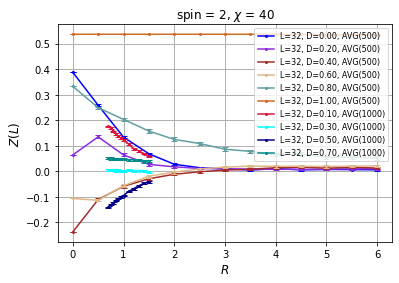

In [42]:
# Jdis & twist Order Parameter

Ls = [32]
Dimer = ["Dim000","Dim020","Dim040","Dim060","Dim080","Dim100"]
Dimer2 = ["Dim010","Dim030","Dim050","Dim070"]
# Dimer = ["Dim025"]
Ns = [500]
Ns2 = [1000]

for l in range(len(Ls)):
    L = Ls[l]

    for d in range(len(Dimer)):
        N = Ns[l]
        dimer = Dimer[d]
        D = float(Dimer[d][3] + '.' + Dimer[d][4])
        myfile = '/home/liusf/tSDRG_DataAnalysis/Sorting_data/Spin'+ str(spin) +'/metadata/ZL/'+ dimer + '/Jdis-ZL/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m' + str(M) + '_jdis-zl_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        plt.plot(df['Jdis'], df['ZL'], "o-", color=carr[l+d], markersize = 2, label = 'L=%d, D=%.2f, AVG(%d)' %(L, D, N))
        if (N != 1):
            plt.errorbar(df['Jdis'], df['ZL'], yerr=df['error'], linestyle='None', capsize=3, capthick=1, color=carr[l+d], label=None)

    for d in range(len(Dimer2)):
        N = Ns2[l]
        dimer = Dimer2[d]
        D = float(Dimer2[d][3] + '.' + Dimer2[d][4])
        myfile = '/home/liusf/tSDRG_DataAnalysis/Sorting_data/Spin'+ str(spin) +'/metadata/ZL/'+ dimer + '/Jdis-ZL/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m' + str(M) + '_jdis-zl_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)
        plt.plot(df['Jdis'], df['ZL'], "o-", color=carr[l+len(Dimer)+d], markersize = 2, label = 'L=%d, D=%.2f, AVG(%d)' %(L, D, N))
        if (N != 1):
            plt.errorbar(df['Jdis'], df['ZL'], yerr=df['error'], linestyle='None', capsize=3, capthick=1, color=carr[l+len(Dimer)+d], label=None)

plt.xlabel(r'$R$', fontsize=12)
plt.ylabel(r'$Z(L)$', fontsize=12)
#plt.xlim(0.6,1)
# plt.ylim(-0.2, 0.3)
#plt.xscale('log')
#plt.yscale('log')
# plt.title('spin = %s, $\dimerization$ = %s, $\chi$ = %d' % (spin, D, M), fontsize=12)
plt.title('spin = %s, $\chi$ = %d' % (spin, M), fontsize=12)
plt.legend(loc = 'best',fontsize=8)
plt.grid(linestyle='-', linewidth=1)
# plt.savefig( dimer + '_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_ZL-Jdis.pdf', format='pdf', dpi=4000)
# plt.savefig('Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_ZL-Jdis.pdf', format='pdf', dpi=4000)
plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_ZL-Jdis.pdf', format='pdf', dpi=4000)
plt.show()

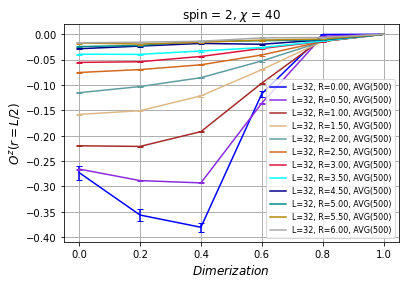

In [43]:
# Dimerization & String Order Parameter

Ls = [32]
# Jdis = ['Jdis070','Jdis075','Jdis080','Jdis085','Jdis090','Jdis095','Jdis100','Jdis110','Jdis120','Jdis130','Jdis140','Jdis150']
Jdis = ['Jdis000','Jdis050','Jdis100','Jdis150','Jdis200','Jdis250','Jdis300','Jdis350','Jdis450','Jdis500','Jdis550','Jdis600']
N = 500

for i in range(len(Ls)):
    L = Ls[i]
    dfstr = pd.DataFrame(columns = ['Dimerization', 'O^z'])

    for j in range(len(Jdis)):
        jdis = Jdis[j]
        J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])
        # if (jdis == 'Jdis200'):
        #     N = 3000
        myfile = '/home/liusf/tSDRG_DataAnalysis/Sorting_data/Spin'+ str(spin) +'/metadata/SOP/'+ jdis + '/Dimer-Oz/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m'+ str(M) +'_dim-sop_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)


        plt.plot(df['Dimerization'] ,df['O^z'], color=carr[i+j], markersize = 2, label = 'L=%d, R=%.2f, AVG(%d)' %(L, J, N))
        plt.errorbar(df['Dimerization'], df['O^z'], color=carr[i+j], yerr=df['error'], linestyle='None', capsize=3, capthick=1, label=None)


plt.xlabel(r'$Dimerization$', fontsize=12)
plt.ylabel(r'$O^z(r=L/2)$', fontsize=12)
#plt.xlim(0.1,1.5)
# plt.ylim(-0.3, 0)
#plt.xscale('log')
#plt.yscale('log')
plt.title('spin = %s, $\chi$ = %s' % (spin, M), fontsize=12)
plt.legend(loc = 'best',fontsize=8)
plt.grid(linestyle='-', linewidth=1)
# plt.savefig( jdis + '_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-Dimerization.pdf', format='pdf', dpi=4000)
# plt.savefig( 'Spin'+ str(spin) +'_'+ BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-Dimerization2.pdf', format='pdf', dpi=4000)
plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_Oz-Dimerization.pdf', format='pdf', dpi=4000)
plt.show()

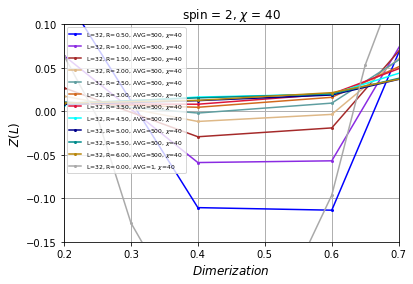

In [48]:
# Dimerization & twist Order Parameter

Ls = [32]
# Jdis = ['Jdis070','Jdis075','Jdis080','Jdis085','Jdis090','Jdis095','Jdis100','Jdis110','Jdis120','Jdis130','Jdis140','Jdis150']
Jdis = ['Jdis050','Jdis100','Jdis150','Jdis200','Jdis250','Jdis300','Jdis350','Jdis450','Jdis500','Jdis550','Jdis600','Jdis000']
N = 500

for i in range(len(Ls)):
    L = Ls[i]
    dfstr = pd.DataFrame(columns = ['Dimerization', 'O^z'])

    for j in range(len(Jdis)):
        jdis = Jdis[j]
        J = float(Jdis[j][4] + '.' + Jdis[j][5] + Jdis[j][6])
        if (jdis == 'Jdis000'):
            N = 1
        myfile = '/home/liusf/tSDRG_DataAnalysis/Sorting_data/Spin'+ str(spin) +'/metadata/ZL/'+ jdis + '/Dimer-ZL/'+ BC +'_L'+ str(L) +'_P' + str(P) + '_m' + str(M) + '_dim-zl_AV'+ str(N) +'.csv'
        df = pd.read_csv(myfile)


        plt.plot(df['Dimerization'], df['ZL'], '-o', color=carr[i+j], markersize = 2, label = 'L=%d, R=%.2f, AVG=%d, $\chi$=%d' %(L, J, N, M))
        # plt.errorbar(df['Dimerization'], df['ZL'], color=carr[i+j+m], yerr=df['error'], linestyle='None', capsize=3, capthick=1, label=None)

plt.xlabel(r'$Dimerization$', fontsize=12)
plt.ylabel(r'$Z(L)$', fontsize=12)
plt.xlim(0.2,0.7)
plt.ylim(-0.15,0.1)
#plt.xscale('log')
#plt.yscale('log')
plt.title('spin = %s, $\chi$ = %d' % (spin, M), fontsize=12)
# plt.title('spin = %s' % (spin), fontsize=12)
plt.legend(loc = 'best',fontsize=6)
plt.grid(linestyle='-', linewidth=1)
# plt.savefig( jdis + '_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_ZL-Dimerization.pdf', format='pdf', dpi=4000)
# plt.savefig( 'Spin'+ str(spin) +'_'+ BC +'_P'+ str(P) +'_m'+ str(M) +'_ZL-Dimerization2.pdf', format='pdf', dpi=4000)
plt.savefig('L'+ str(L) +'_Spin'+ str(spin) +'_' + BC + '_P'+ str(P) +'_m'+ str(M) +'_ZL-Dimerization.pdf', format='pdf', dpi=4000)
plt.show()